# Python Stats HypothesisTesting - Test of Mean Differences

## Cases of Hypothesis testing of difference between means

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats.distributions as dist
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# set maximum columns display as 50
pd.set_option('display.max_columns',50) 

%matplotlib inline

In [2]:
# import the dataset
df = pd.read_csv('Salaries.csv', )
df.head()

# this dataset shows the salary information for workers in SF

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
# check the size of the dataset
df.shape

(148654, 13)

In [4]:
# check missing values
df.isnull().sum()

# no missing values in total pay and year

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [5]:
# drop null columns
df.drop(['Notes','Status'], axis = 1, inplace = True)
df.shape

(148654, 11)


**Estimate population parameters:**
- When we do hypothsis testing for population mean, we are trying to use data collected from samples to estimate population parameters (which we do not know).
- So here, instead of Z-test statistics, we should use T-test statistics. 

**Compare Z and T tests:**
- T distribution has **flatter tails** comparing to Z distribution. 
- T-stats adjusted the df(degrees of freedom), to reduce the varinace casued by using sample statistics to infer hypothesized population parameters 
- for T-distribution, df = n-1, not n
- when n is very large, e.g. over 1000, the t distribution is very similar to Z distribution 

**In addition:**
- in actual data analysis, we need to further examine missing values and find out potential reasons for missing.
- here, we focus on showing the process of hypothesis testing.

## 1. hypothesis testing for one-sample test

**Example Scenario:**

- Assume we know that in 2014, the average total pay is $65,000 nationwide (in U.S.).

- Here, we want to know:
  - whether the average total pay among employees in SF is very different from the nationwide avgerage pay in 2014.  


**Assumptions Checking:**
- Assume data were randomly sampled from all employees in SF 
- Sample size here is big enough for ensuring nomality of data 
    - here the data is not normally distributed, but here we only aim to show how to calculate t-tests.

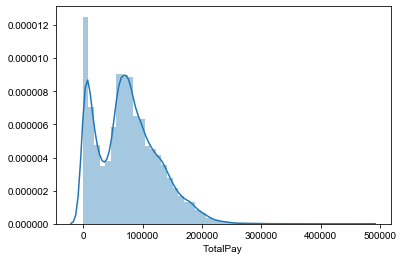

In [6]:
sns.distplot(df['TotalPay'][df['Year'] == 2014])
sns.set(style="whitegrid")
plt.show()

# not uni-modal; 

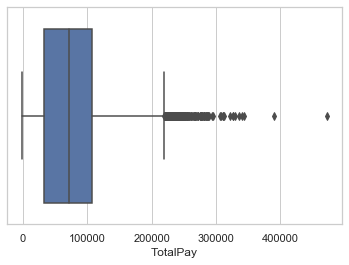

In [7]:
# box plot
sns.boxplot(df['TotalPay'][df['Year'] == 2014])
plt.show()

# the data overall skew to the right

**Two-sided one-sample t-test:**


Null Hypothesis (H0): m = μ0

Alternative Hypothesis (H1): m != μ0 

 Set confidence level (alpha) at 95%

In [8]:
# get a subset of data for year 2014
sub_df = df['TotalPay'][(df['Year']== 2014) & (df['TotalPay'] > 0)]
len(sub_df)

38070

In [9]:
# check the descriotive stats of titalpay in 2014
sub_df.describe().round(2)


count     38070.00
mean      75568.99
std       51656.87
min           1.83
25%       33687.11
50%       72413.84
75%      108065.21
max      471952.64
Name: TotalPay, dtype: float64

### 1). mannual calculation

- t = (best estimate - null estimate)/estimated standard error (se)
    = (m - μ0)/se
- se = sample standard deviation/ sqrt(n) 

In [10]:
# calculate estimated standard error 
se = sub_df.std()/np.sqrt(sub_df.shape[0])
se

264.750432239159

In [11]:
# calculate t score
mu = 65000
t = (sub_df.mean() - 65000)/se
t

39.920588854429724

In [12]:
# calculate p-value
pvalue = 2*dist.norm.cdf(-np.abs(t))
t, pvalue

# p < 0.05, reject null

(39.920588854429724, 0.0)

**Conclusion:**
- With 95% confidence level, I found that there is a significant difference between the average total pay employees received in SF in 2014 and the nationwide average total pay. 
- And that the average total pay employees received in SF is significantly higher than the nationwide average total pay in the same year.

### 2). built-in statsmodels

**For one-sample t-test:**
  
- scipy.stats.ttest_1samp (a, popmean, axis)
    - a: sample observation (array format: could be a list or pd.Series)
    - popmean: population mean
    - axis: default = 0 (optional)

In [13]:
# check t and p values
t, pvalue = stats.ttest_1samp(sub_df, 65000)
t, pvalue

# same results as above # p < 0.05, reject null

(39.92058885443079, 0.0)

## 2. hypothesis testing two independent samples

**Example Scenario:**

- Assume we want to compare the differences in average total pay employees received in 2013, and 2014 in SF.  

Null Hypothesis (H0): x1 = x2

Alternative Hypothesis (H1): x1 != x2 

Set confidence level (alpha) at 95%

**two sample mean difference:**

- 1. assume both samples have the same variance (Pooled Approach)

    - t = (best estimate - null estimate)/estimated standard error (se)
      = (x1-x2)/ sp(1/n1 + 1/n2)
    - se = Sp(1/n1 + 1/n2)
    - Sp = sqrt( ( (n1-1)s1^2 + (n2-1)s2^2 ) / (n1+n2-2) ): s - sample std
    - df = n1 + n2 -2


- 2. assume both samples have different variance (Unpooled Approach)

    - t = (best estimate - null estimate)/estimated standard error (se)
      = (x1-x2)/ se
    - se = sqrt(s1^2/n1 + s2^2/n)
    - df = min(n1-1, n2 -1): df takes the smaller value between (n1-1) and (n2-1)


**When n is small, use Wilcoxon Sign Rank test**

In [14]:
# get subset of data for total pay in 2013, 2014
sub_df13 = df['TotalPay'][(df['Year']== 2013) & (df['TotalPay'] > 0)]
sub_df14 = df['TotalPay'][(df['Year']== 2014) & (df['TotalPay'] > 0)]
print(len(sub_df13))
print(len(sub_df14))

37318
38070


In [15]:
# check the variance for both sets of data
print(sub_df13.describe())
print(sub_df14.describe())

count     37318.000000
mean      78210.405992
std       52615.027374
min           5.560000
25%       38321.582500
50%       74874.610000
75%      110147.012500
max      347102.320000
Name: TotalPay, dtype: float64
count     38070.000000
mean      75568.993154
std       51656.873381
min           1.830000
25%       33687.107500
50%       72413.840000
75%      108065.210000
max      471952.640000
Name: TotalPay, dtype: float64


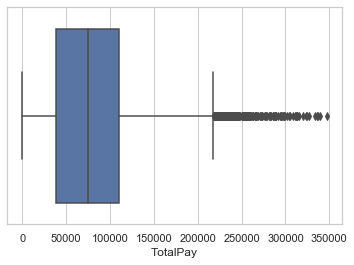

In [16]:
# check boxplot
sns.boxplot(sub_df13)
plt.show()

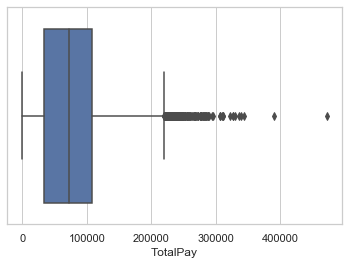

In [17]:
sns.boxplot(sub_df14)

Here we still can see a difference in the data, so we take the **unpooled appraoch - assume unequal variance**

### 1). mannual calculation

- t = (best estimate - null estimate)/estimated standard error (se)
     = (x1-x2)/ se
- se = sqrt(s1^2/n1 + s2^2/n)
- df = min(n1-1, n2 -1): df takes the smaller value between (n1-1) and (n2-1)

In [18]:
# calculate estimated standard error
s1 = sub_df13.std()
n1 = len(sub_df13)
s2 = sub_df14.std()
n2 = len(sub_df14)
se = np.sqrt(s1**2/n1 + s2**2/n2)
se

379.83582383158955

In [19]:
# calculate t score
x1 = sub_df13.mean()
x2 = sub_df14.mean()
t = (x1-x2)/se
t

6.954090877083771

In [20]:
# calculate p-value
pvalue = 2*dist.norm.cdf(-np.abs(t))
t, pvalue

# p < 0.05, reject null

(6.954090877083771, 3.548428230756511e-12)

**Conclusion:**
- With 95% confidence level, I found that there is a significant difference between the average total pay employees received in 2013 and 2014 in SF. 
- And that the average total pay employees received in 2013 is significantly higher than that of 2014 in SF.

### 2). built-in statsmodels

**For two-sample t-test:**
  
- scipy.stats.ttest_ind(a, b, equal_var ) 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

    - a, b: sample observation (array format: could be a list or pd.Series)
    - equal_var: Boolean - True or False

In [21]:
t, pvalue = stats.ttest_ind(sub_df13, sub_df14, equal_var = False)
t, pvalue

# same reults as above

(6.9540908770770065, 3.5772222865934194e-12)

## 3. hypothesis testing for difference in means for paired data

**For insatnce: repreated measures on the same object (pre-post surveys etc.)**

Null Hypothesis (H0): x1 - x2 = 0

Alternative Hypothesis (H1): x1 - x2 != 0 

Set confidence level (alpha) at 95%

**calculation formula:**

- t = (best estimate - null estimate)/estimated standard error (se)
     = (xd)/ se
- xd = x1-x2: difference in means
- se = sd/ sqrt(n)


**when use built-in statsmodels:**
    
t, pvalue = stats.ttest_ind(a, b, equal_var = boolean)
- a, b: have to have the same shape or length
